In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from FRCfuncs import *
from scipy.optimize import curve_fit

## Determine effect of image size on FRC 

Todo: Export images consisting of single linescans in Ani and redo analysis with those

In [2]:
t0 = time.time()
wdir = r'N:\Singlem\singlem19-1\March\06_FRC_20nmCrimson_NV'
powers = np.array([3,5,10])
#Data will be stored in a list. Each entry of list contains 3D image of type numpy array.
imStackLst = []
for power in powers:
    ext = r'imgSizeSeries\{0:d}muSq_imA\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirA = os.path.join(wdir, ext)
    ext = r'imgSizeSeries\{0:d}muSq_imB\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirB = os.path.join(wdir, ext)
    imA, imB = readtxt(filedirA, filedirB)
    imStackLst.append ([imA, imB])
t1 = time.time()
print ("computational time equals: " + str( t1 - t0))

computational time equals: 1.0996780395507812


applied drift correction of -1.388159 nm in x and and 8.444549 nm in y.



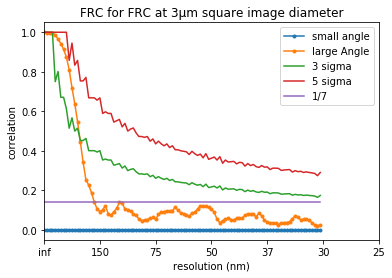

retrieved resolution for FRC at 3μm square image diameter is: 167nm

applied drift correction of 1.094954 nm in x and and 5.741214 nm in y.



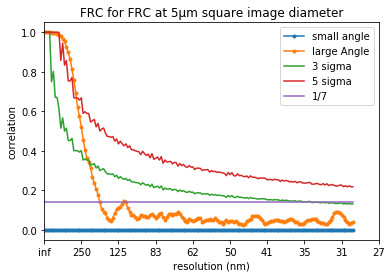

retrieved resolution for FRC at 5μm square image diameter is: 167nm

applied drift correction of -0.288126 nm in x and and 4.726309 nm in y.



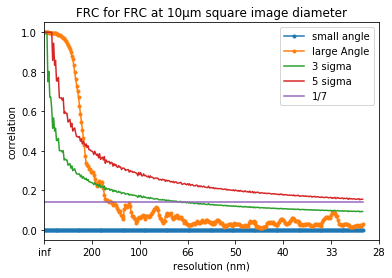

retrieved resolution for FRC at 10μm square image diameter is: 147nm



In [3]:
Nimg = len(powers)
FRC = np.zeros((Nimg,2))
Bleaching = np.zeros(Nimg)
BleachingSigma = np.zeros(Nimg)
for i, imStack in enumerate(imStackLst):
    power = powers[i]
    imA = imStack[0]
    imB = imStack[1]
    __, __, __, __, __, res = FRCAnalysis(imA, imB, 15, title = "FRC at " + str(power) + u"\u03BCm square image diameter")
    FRC[i] = res[2]

In [5]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/(1+np.sqrt(x)/Is)

def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10)):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0)


In [6]:
STEDpowers = powers
popt, pcov = fitSTEDpower(STEDpowers, FRC)
fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,FRC, '.-', label = 'FRC resolution')
#plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel(u'\u03BCm square img size ')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 20nm Crimson Beads')
plt.legend()
plt.savefig("20nmCrimsonSTEDpowerSeriesFRC.png", dpi = 300)
plt.show()


ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [20]:
fftA = np.fft.fft2(imA)
fftB = np.fft.fft2(imB)
fftAB = fftA * np.conj(fftB)
imAB = np.fft.ifft2(fftAB)

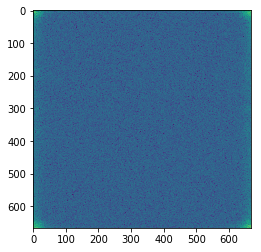

In [21]:
plt.imshow(np.log(abs(fftAB)))

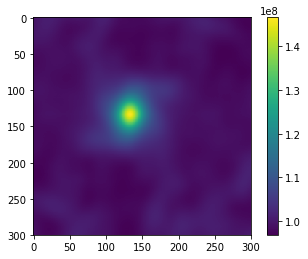

In [26]:
plt.imshow(np.real(np.fft.fftshift(imAB)[200:500,200:500]))
plt.colorbar()

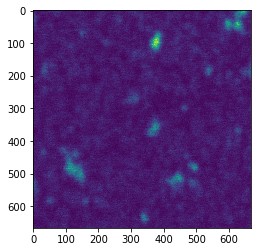

In [4]:
plt.imshow(imA)